In [1]:
 #  1. Importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns

# 2. Loading the DataSet

In [5]:
df = pd.read_csv('ECommerce_consumer behaviour.csv')

In [6]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125.0,1.0,2.0,18.0,NaN,17.0,1.0,0.0,13.0,pantry,baking ingredients
1,2425083,49125.0,1.0,2.0,18.0,NaN,91.0,2.0,0.0,16.0,dairy eggs,soy lactosefree
2,2425083,49125.0,1.0,2.0,18.0,NaN,36.0,3.0,0.0,16.0,dairy eggs,butter
3,2425083,49125.0,1.0,2.0,18.0,NaN,83.0,4.0,0.0,4.0,produce,fresh vegetables
4,2425083,49125.0,1.0,2.0,18.0,NaN,83.0,5.0,0.0,4.0,produce,fresh vegetables


# 3. Number of rows and columns

In [8]:
df.shape

(1689560, 12)

# 4. DataFrame information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689560 entries, 0 to 1689559
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1689560 non-null  int64  
 1   user_id                 1689559 non-null  float64
 2   order_number            1689559 non-null  float64
 3   order_dow               1689559 non-null  float64
 4   order_hour_of_day       1689559 non-null  float64
 5   days_since_prior_order  1585242 non-null  float64
 6   product_id              1689559 non-null  float64
 7   add_to_cart_order       1689559 non-null  float64
 8   reordered               1689559 non-null  float64
 9   department_id           1689559 non-null  float64
 10  department              1689559 non-null  object 
 11  product_name            1689559 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 154.7+ MB


# 5. Checking missing values

In [10]:
df.isna().sum()

,0
order_id,0
user_id,1
order_number,1
order_dow,1
order_hour_of_day,1
days_since_prior_order,104318
product_id,1
add_to_cart_order,1
reordered,1
department_id,1


# 6. Checking duplicate values

In [11]:
df.duplicated().sum()

np.int64(0)

# 7. Number of unique values

In [12]:
df.nunique()

,0
order_id,167261
user_id,95211
order_number,100
order_dow,7
order_hour_of_day,24
days_since_prior_order,31
product_id,134
add_to_cart_order,109
reordered,2
department_id,21


# 8. Handle missing values in days_since_prior_order column

In [13]:
df['days_since_prior_order']

,days_since_prior_order
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1689555,21.0
1689556,21.0
1689557,21.0
1689558,21.0


In [15]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna('0')

df['days_since_prior_order']

,days_since_prior_order
0,0
1,0
2,0
3,0
4,0
...,...
1689555,21.0
1689556,21.0
1689557,21.0
1689558,21.0


# 9. Converting days_since_prior_order into int data type




In [16]:
df['days_since_prior_order'] = df['days_since_prior_order'].astype(int)
df['days_since_prior_order']

,days_since_prior_order
0,0
1,0
2,0
3,0
4,0
...,...
1689555,21
1689556,21
1689557,21
1689558,21


In [17]:
df.groupby('order_dow')['user_id'].agg(['count'])

,count
order_dow,
0.0,328635
1.0,291368
2.0,219871
3.0,199346
4.0,196174
5.0,218890
6.0,235275


# 10. groupby on order_dow(Day of the week) column

In [18]:
df.groupby('order_dow')['user_id'].agg(['count'])

,count
order_dow,
0.0,328635
1.0,291368
2.0,219871
3.0,199346
4.0,196174
5.0,218890
6.0,235275


In [19]:
df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by = 'count')

,count
order_dow,
4.0,196174
3.0,199346
5.0,218890
2.0,219871
6.0,235275
1.0,291368
0.0,328635


In [20]:
df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by = 'count', ascending = False)

,count
order_dow,
0.0,328635
1.0,291368
6.0,235275
2.0,219871
5.0,218890
3.0,199346
4.0,196174


In [21]:
result = df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by = 'count', ascending = False)
result

,count
order_dow,
0.0,328635
1.0,291368
6.0,235275
2.0,219871
5.0,218890
3.0,199346
4.0,196174


# 11. Number of purchases by day

array([<Axes: ylabel='count'>], dtype=object)

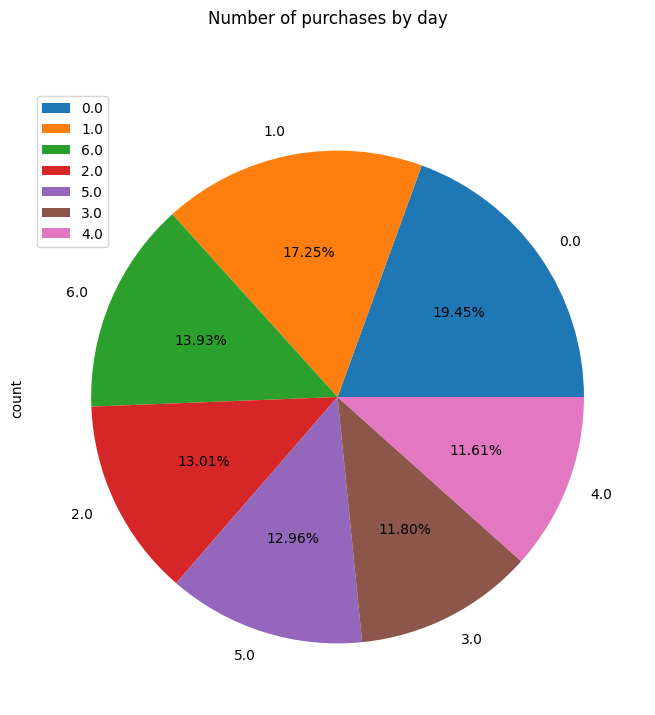

In [22]:
result.plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    subplots = True,
    title = 'Number of purchases by day',
    figsize = (8, 8)
)

# 12. Time of day, when the order was made

In [23]:
result1 = df.groupby('order_hour_of_day', as_index=False).agg({'user_id':'count'})
result1

,order_hour_of_day,user_id
0,0.0,11383
1,1.0,6061
2,2.0,3584
3,3.0,2437
4,4.0,2729
5,5.0,4687
6,6.0,15258
7,7.0,45398
8,8.0,88525
9,9.0,125444


In [24]:
result1.sort_values(by='user_id',ascending=False)

,order_hour_of_day,user_id
10,10.0,144407
11,11.0,142632
14,14.0,140843
15,15.0,139306
13,13.0,138860
12,12.0,137302
16,16.0,133141
9,9.0,125444
17,17.0,107903
8,8.0,88525


# 13. Keep the transactions separate like, morning, afternoon, evening, night

In [25]:
def order_time(x):
    if x in [6,7,8,9,10,11,12]:
        return 'Morning'
    if x in [13,14,15,16,17]:
        return 'Afternoon'
    if x in [18,19,20,21,22]:
        return 'Evening'
    if x in [23,24,0,1,2,3,4,5]:
        return 'Night'
    return x
df['order_time_list']=df['order_hour_of_day'].apply(order_time)
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list
0,2425083,49125.0,1.0,2.0,18.0,0,17.0,1.0,0.0,13.0,pantry,baking ingredients,Evening
1,2425083,49125.0,1.0,2.0,18.0,0,91.0,2.0,0.0,16.0,dairy eggs,soy lactosefree,Evening
2,2425083,49125.0,1.0,2.0,18.0,0,36.0,3.0,0.0,16.0,dairy eggs,butter,Evening
3,2425083,49125.0,1.0,2.0,18.0,0,83.0,4.0,0.0,4.0,produce,fresh vegetables,Evening
4,2425083,49125.0,1.0,2.0,18.0,0,83.0,5.0,0.0,4.0,produce,fresh vegetables,Evening


In [26]:
result2 = df.groupby('order_time_list')['user_id'].agg(['count'])
result2

,count
order_time_list,
Afternoon,660053
Evening,279263
Morning,698966
Night,51277


In [27]:
result2 = result2.sort_values(by = 'count',ascending = False)
result2

,count
order_time_list,
Morning,698966
Afternoon,660053
Evening,279263
Night,51277


<Axes: title={'center': 'Time of day when, the order was made'}, xlabel='order_time_list'>

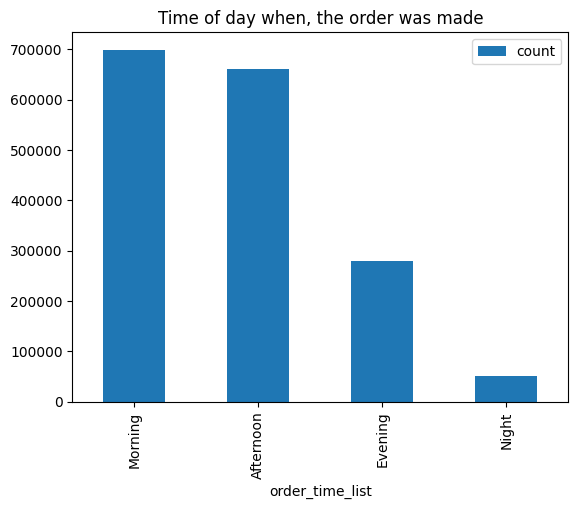

In [28]:
result2.plot(
    kind = 'bar',
    title = 'Time of day when, the order was made'
)

# 14. The time when the order was made by day and time of day

In [29]:
df.pivot_table(
    index = 'order_dow',
    columns = 'order_time_list',
    values = 'user_id',
    aggfunc = ['count']
)

count                      
order_time_list Afternoon Evening Morning Night
order_dow                                      
0.0                136069   50620  132431  9515
1.0                107889   42794  133189  7496
2.0                 84472   38354   90365  6680
3.0                 79159   35007   79087  6093
4.0                 74861   38325   76316  6672
5.0                 84533   35666   91624  7067
6.0                 93070   38497   95954  7754

In [30]:
result3 = df.pivot_table(
    index = 'order_dow',
    columns = 'order_time_list',
    values = 'user_id',
    aggfunc = ['count']
)
result3

count                      
order_time_list Afternoon Evening Morning Night
order_dow                                      
0.0                136069   50620  132431  9515
1.0                107889   42794  133189  7496
2.0                 84472   38354   90365  6680
3.0                 79159   35007   79087  6093
4.0                 74861   38325   76316  6672
5.0                 84533   35666   91624  7067
6.0                 93070   38497   95954  7754

<Axes: title={'center': 'The time when the order was made by day and time of day'}, xlabel='order_dow'>

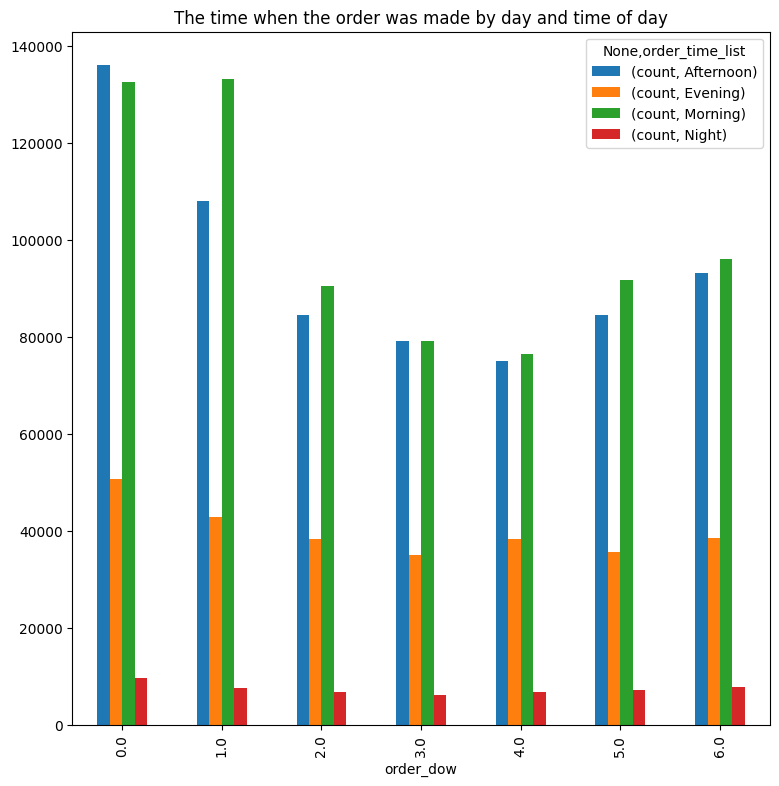

In [31]:
result3.plot(
    kind = 'bar',
    title = 'The time when the order was made by day and time of day',
    figsize = (9,9)
)

# 15. The number of orders that users have made

In [32]:
df.groupby('order_number')['user_id'].agg(['count'])

,count
order_number,
1.0,104317
2.0,102069
3.0,101217
4.0,99849
5.0,88065
...,...
96.0,904
97.0,727
98.0,714


In [33]:
def order_number_group(x):
    if x <= 20 :
        x= '1-20 orders'
    elif x >20 and x <=40:
        x= '21-40 orders'
    elif x >40 and x <=60:
        x= '41-60 orders'
    elif x >60 and x <=80:
        x= '61-80 orders'
    else:
        x= '81-100 orders'
    return x
df['order_number_group']=df['order_number'].apply(order_number_group)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_list,order_number_group
0,2425083,49125.0,1.0,2.0,18.0,0,17.0,1.0,0.0,13.0,pantry,baking ingredients,Evening,1-20 orders
1,2425083,49125.0,1.0,2.0,18.0,0,91.0,2.0,0.0,16.0,dairy eggs,soy lactosefree,Evening,1-20 orders
2,2425083,49125.0,1.0,2.0,18.0,0,36.0,3.0,0.0,16.0,dairy eggs,butter,Evening,1-20 orders
3,2425083,49125.0,1.0,2.0,18.0,0,83.0,4.0,0.0,4.0,produce,fresh vegetables,Evening,1-20 orders
4,2425083,49125.0,1.0,2.0,18.0,0,83.0,5.0,0.0,4.0,produce,fresh vegetables,Evening,1-20 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689555,2232633,156761.0,4.0,2.0,20.0,21,21.0,13.0,1.0,16.0,dairy eggs,packaged cheese,Evening,1-20 orders
1689556,2232633,156761.0,4.0,2.0,20.0,21,36.0,14.0,1.0,16.0,dairy eggs,butter,Evening,1-20 orders
1689557,2232633,156761.0,4.0,2.0,20.0,21,24.0,15.0,1.0,4.0,produce,fresh fruits,Evening,1-20 orders
1689558,2232633,156761.0,4.0,2.0,20.0,21,63.0,16.0,1.0,9.0,dry goods pasta,grains rice dried goods,Evening,1-20 orders


In [34]:
result4 = df.groupby('order_number_group')['user_id'].agg(['count']).sort_values(by = 'count', ascending = False)
result4

,count
order_number_group,
1-20 orders,1194086
21-40 orders,317507
41-60 orders,116931
61-80 orders,42974
81-100 orders,18061


array([<Axes: ylabel='count'>], dtype=object)

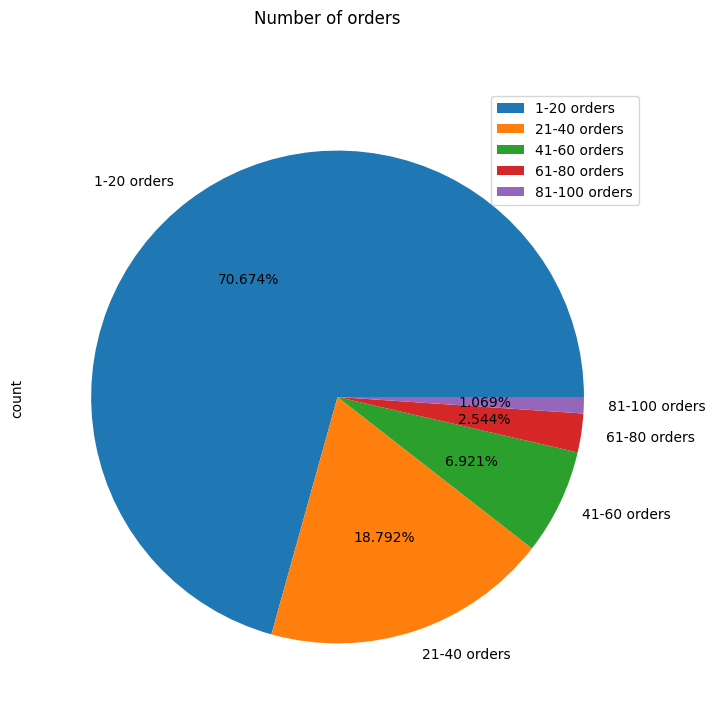

In [35]:
result4.plot(
    kind = 'pie',
    autopct = '%1.3f%%',
    subplots = True,
    title = 'Number of orders',
    figsize = (8, 8)
)


# 16. How many days have passed since the pre-order

In [36]:
result4 = df.groupby('days_since_prior_order')['user_id'].agg('count').sort_values(ascending = False)
result4

,user_id
days_since_prior_order,
7,178747
30,175875
6,130077
0,127333
5,108216
4,104601
8,99335
3,95018
2,74677


<Axes: title={'center': 'Days since prior order'}, xlabel='days_since_prior_order'>

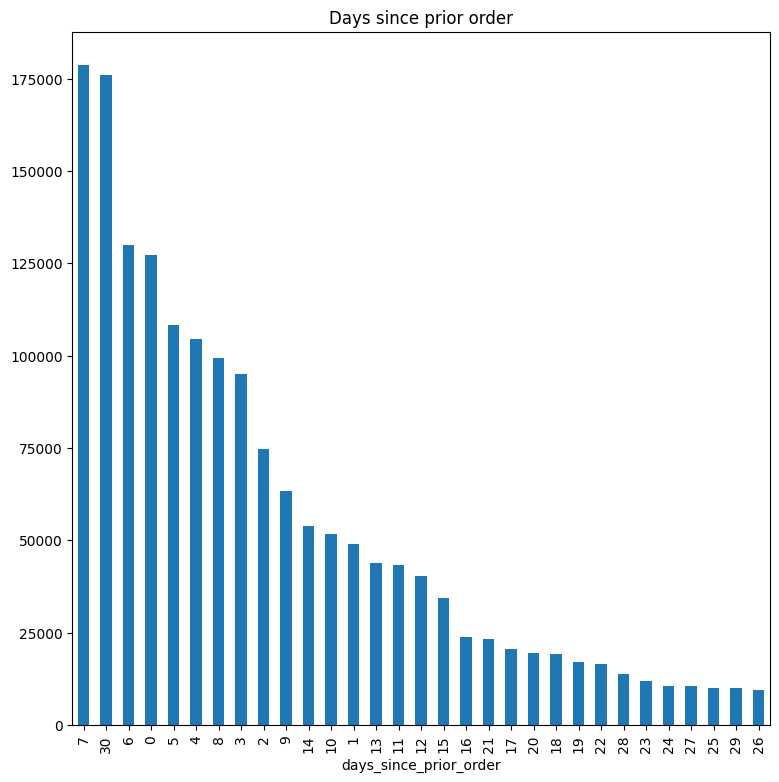

In [37]:
result4.plot(
    kind = 'bar',
    title = 'Days since prior order',
    figsize = (9,9)
)

# 17. Top 15 most popular products from users

In [38]:
result5 = df.groupby('product_id')['user_id'].agg(['count']).sort_values(by = 'count',ascending = False).head(15)
result5

,count
product_id,
24.0,188845
83.0,177790
123.0,91660
120.0,75779
21.0,51520
84.0,46098
115.0,44054
107.0,37868
91.0,32937


array([<Axes: ylabel='count'>], dtype=object)

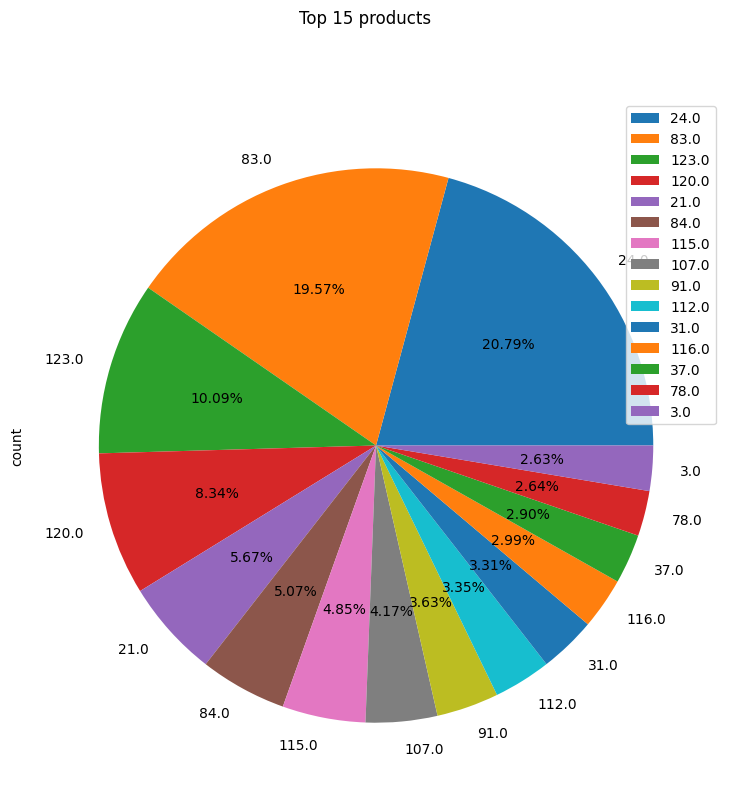

In [39]:
result5.plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    subplots = True,
    title = 'Top 15 products',
    figsize = (9,9)
)

In [40]:
result6 = df.groupby('product_name')['user_id'].agg(['count']).sort_values(by = 'count',ascending = False).head(15)
result6

,count
product_name,
fresh fruits,188845
fresh vegetables,177790
packaged vegetables fruits,91660
yogurt,75779
packaged cheese,51520
milk,46098
water seltzer sparkling water,44054
chips pretzels,37868
soy lactosefree,32937


array([<Axes: ylabel='count'>], dtype=object)

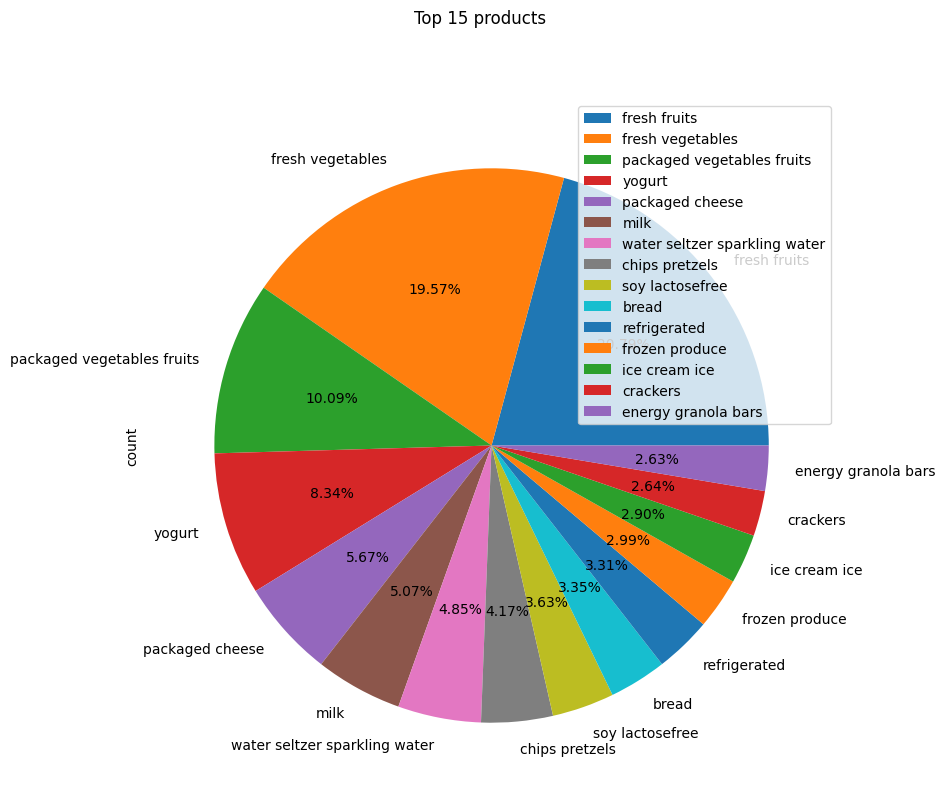

In [41]:
result6.plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Top 15 products',figsize=(9,9))

# 18. How many products users add to the cart

In [42]:
atco_u = df.groupby('add_to_cart_order', as_index = False).agg({'user_id': 'count'}).sort_values(by='user_id',ascending=False)
atco_u

,add_to_cart_order,user_id
0,1.0,167260
1,2.0,159016
2,3.0,149260
3,4.0,138598
4,5.0,127137
...,...,...
104,105.0,1
105,106.0,1
106,107.0,1
107,108.0,1


<Axes: xlabel='user_id', ylabel='Count'>

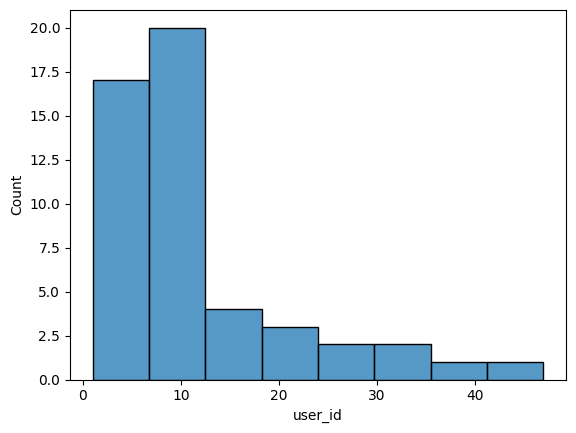

In [43]:
sns.histplot(atco_u.query('user_id<50').user_id, kde = False)

# 19. How many products were added to the cart

In [44]:
on_atco = df.groupby('order_number',as_index=False).agg({'add_to_cart_order': 'count'}).sort_values(by='add_to_cart_order', ascending = False)
on_atco

,order_number,add_to_cart_order
0,1.0,104317
1,2.0,102069
2,3.0,101217
3,4.0,99849
4,5.0,88065
...,...,...
93,94.0,690
90,91.0,656
98,99.0,591
94,95.0,580


<Axes: xlabel='add_to_cart_order', ylabel='Count'>

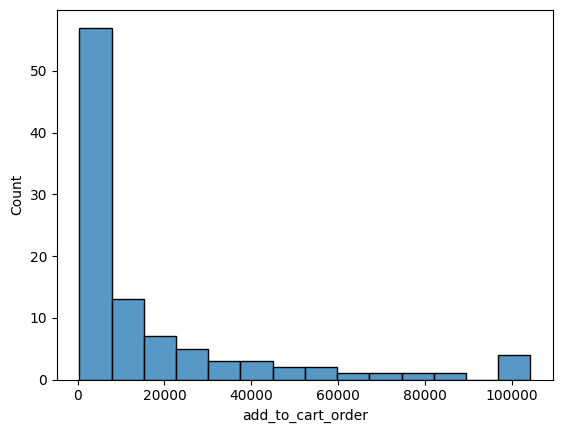

In [45]:
sns.histplot(on_atco.add_to_cart_order, kde=False)

# 20. Reordereds

In [46]:
df['reordered'].value_counts()

,count
reordered,
1.0,996260
0.0,693299


In [47]:
result7 = df.groupby('department')['reordered'].agg(['count']).sort_values(by='count',ascending=False)
result7

,count
department,
produce,492139
dairy eggs,281721
snacks,151421
beverages,140638
frozen,117108
pantry,96925
bakery,61030
canned goods,55315
deli,54549


<Axes: title={'center': 'Reordereds'}, ylabel='department'>

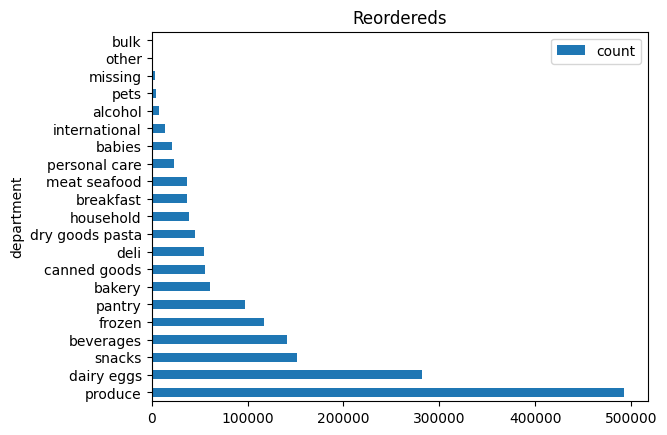

In [48]:
result7.plot(kind = 'barh', title = 'Reordereds')

In [49]:
result8 = df.groupby('reordered')['user_id'].agg(['count'])
result8

,count
reordered,
0.0,693299
1.0,996260


array([<Axes: ylabel='count'>], dtype=object)

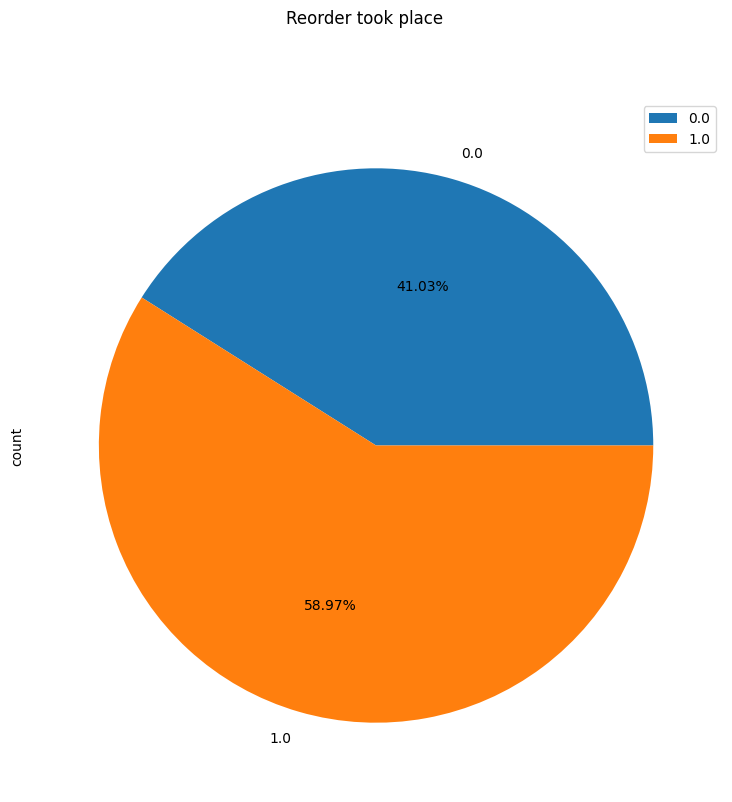

In [50]:
result8.plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Reorder took place',figsize=(9,9))

# 21. Top 10 reorders

In [51]:
result9 = df.groupby('product_id')['reordered'].agg(['count']).sort_values(by = 'count', ascending = False).head(10)
result9

,count
product_id,
24.0,188845
83.0,177790
123.0,91660
120.0,75779
21.0,51520
84.0,46098
115.0,44054
107.0,37868
91.0,32937


array([<Axes: ylabel='count'>], dtype=object)

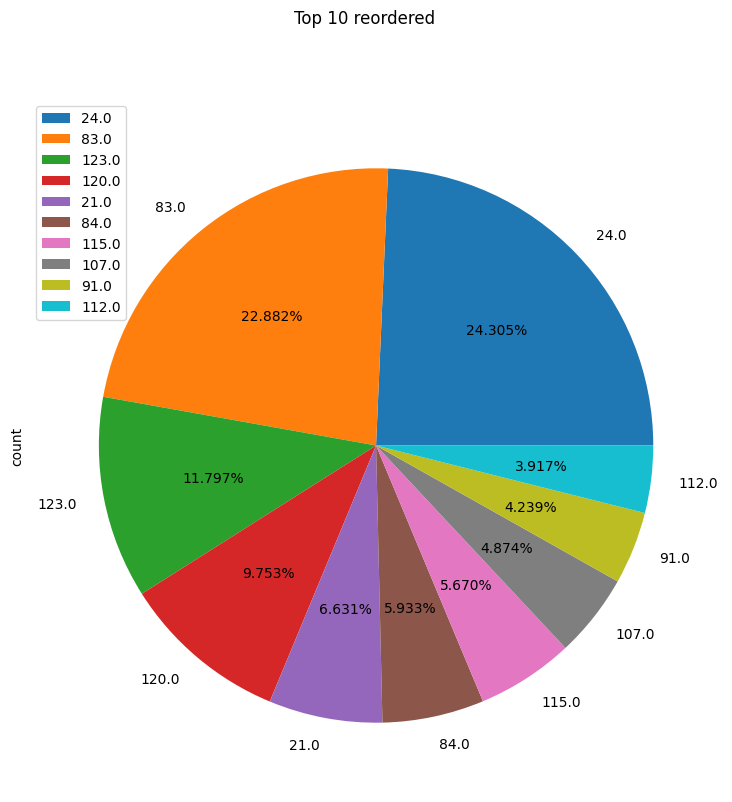

In [52]:
result9.plot(
    kind = 'pie',
    autopct = '%1.3f%%',
    subplots = True,
    title = 'Top 10 reordered',
    figsize = (9, 9)
)